In [200]:
from sklearn import datasets, svm, metrics
iris=datasets.load_iris()
digits=datasets.load_digits()
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

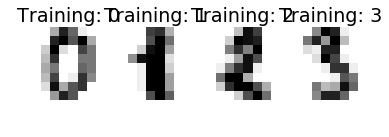

In [201]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [202]:
mes=io.imread('data/m05/m05s01t33ROIBinaries.tif')
mesA=np.asarray(mes[:, :, :,0])
mesA=mesA/255
ep=io.imread('data/m05/m05s07t35PaddedROIBinaries.tif')
epA=np.asarray(ep[:,:,:,0])
epA=epA/255

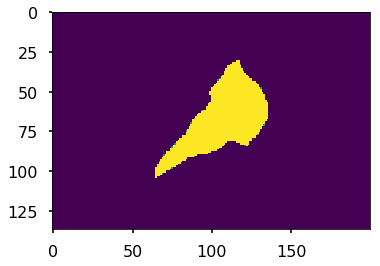

In [203]:
plt.imshow(mesA[1])

In [204]:
test=np.arange(27).reshape((3,3,3))
test

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [205]:
test.reshape(3,9).T


array([[ 0,  9, 18],
       [ 1, 10, 19],
       [ 2, 11, 20],
       [ 3, 12, 21],
       [ 4, 13, 22],
       [ 5, 14, 23],
       [ 6, 15, 24],
       [ 7, 16, 25],
       [ 8, 17, 26]])

In [206]:
mesA.shape

(47, 137, 200)

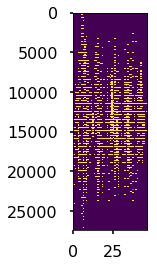

In [207]:
mes2D=mesA.reshape(47, 137*200).T
mes2D.shape
plt.imshow(mes2D, aspect=.005)

In [208]:
epA.shape

(81, 137, 200)

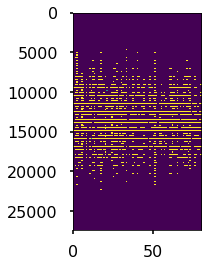

In [209]:
ep2D=epA.reshape(81, 137*200).T
ep2D.shape
plt.imshow(ep2D, aspect=.005)

In [210]:
ep2Dpd=pd.DataFrame(ep2D)
mes2Dpd=pd.DataFrame(mes2D)

In [211]:
mesLabel=pd.DataFrame(np.ones(47))
mesLabel.head()
epLabel=pd.DataFrame(np.zeros(81))
epLabel.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [212]:
meswLabel=pd.concat([mes2Dpd, mesLabel.T])
print(mes2Dpd.shape)
print(meswLabel.shape)

epwLabel=pd.concat([ep2Dpd, epLabel.T])
print(ep2Dpd.shape)
print(epwLabel.shape)

allPD=pd.concat([meswLabel, epwLabel], axis=1)
allPD.shape

(27400, 47)
(27401, 47)
(27400, 81)
(27401, 81)


(27401, 128)

In [213]:
sns.set_context('poster')

In [214]:
mlFeats=pd.read_csv('data/m05/m05s01s07MLFeatsnoNaNsOneHotLabels.csv', index_col='ID')

In [215]:
mlFeats.head()

,Area,Mean,StdDev,Mode,Min,Max,X,Y,XM,YM,...,Kurt,RawIntDen,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Label
ID,,,,,,,,,,,,,,,,,,,,,
1,0.207,2281.790,2055.745,670,397,13231,2.713,2.750,2.660,2.803,...,3.648,4362782,2.250,3.344,57.355,0.424,3.559,0.281,0.520,0
2,0.227,2604.964,2520.365,1008,424,13231,2.739,2.665,2.644,2.718,...,2.765,5449584,2.302,3.052,54.389,0.432,2.119,0.472,0.820,0
3,0.225,2756.842,2154.553,959,427,13231,2.613,2.646,2.598,2.662,...,2.941,5723204,2.406,3.010,46.521,0.464,1.328,0.753,0.820,0
4,0.764,2491.731,2148.274,691,394,13231,2.698,2.721,2.617,2.755,...,4.121,17544275,2.021,2.740,170.463,0.843,1.459,0.685,0.927,0
5,0.331,2328.890,1865.934,691,424,17140,2.685,2.661,2.603,2.612,...,9.591,7093800,2.260,2.302,135.000,0.495,2.718,0.368,0.721,0


In [216]:
feats_grouped=mlFeats.groupby("Label")

In [217]:
feats_grouped

In [218]:
mlFeats.columns.values

array(['Area', 'Mean', 'StdDev', 'Mode', 'Min', 'Max', 'X', 'Y', 'XM',
       'YM', 'Perim.', 'BX', 'BY', 'Width', 'Height', 'Major', 'Minor',
       'Angle', 'Circ.', 'Feret', 'IntDen', 'Median', 'Skew', 'Kurt',
       'RawIntDen', 'FeretX', 'FeretY', 'FeretAngle', 'MinFeret', 'AR',
       'Round', 'Solidity', 'Label'], dtype=object)

In [219]:
mlFeats['Circ.'].mean()

0.6186880000000002

In [220]:
feats_grouped['Circ.'].mean()

Label
0    0.498326
1    0.688772
Name: Circ., dtype: float64

In [221]:
feats_grouped.mean().T

Label,0,1
Area,3.720652e-01,2.413038e-01
Mean,2.356940e+03,3.443170e+03
StdDev,2.083451e+03,3.669935e+03
Mode,8.553696e+02,1.294911e+03
Min,4.120000e+02,4.455190e+02
Max,1.518976e+04,2.707809e+04
X,2.675717e+00,2.668861e+00
Y,2.669478e+00,2.667203e+00
XM,2.606413e+00,2.662215e+00
YM,2.672935e+00,2.756810e+00


In [222]:
feats_grouped.min().T

Label,0,1
Area,0.031,0.058
Mean,1297.038,2163.980
StdDev,770.726,1013.109
Mode,481.000,663.000
Min,394.000,431.000
Max,4563.000,6149.000
X,2.526,2.568
Y,2.501,2.556
XM,2.409,2.577
YM,2.545,2.642


In [223]:
feats_grouped.describe().T

Label                 0           1
AR    count   46.000000   79.000000
      mean     2.566174    1.587620
      std      1.397431    0.457816
      min      1.124000    1.043000
      25%      1.671750    1.245000
      50%      2.177500    1.460000
      75%      2.906750    1.793000
      max      7.986000    3.746000
Angle count   46.000000   79.000000
      mean   102.251957   98.236190
      std     53.971533   50.938491
      min      1.247000    4.176000
      25%     54.009500   65.877500
      50%    106.193000   90.824000
      75%    146.437250  138.181000
      max    179.684000  179.726000
Area  count   46.000000   79.000000
      mean     0.372065    0.241304
      std      0.225580    0.114761
      min      0.031000    0.058000
      25%      0.207000    0.162500
      50%      0.323500    0.214000
      75%      0.486250    0.300500
      max      0.915000    0.615000
BX    count   46.000000   79.000000
      mean     2.207000    2.367228
      std      0.226894    0.095050
      min      1.625000    2.031000
      25%      2.059750    2.312000
      50%      2.213500    2.375000
...                 ...         ...
X     std      0.077310    0.029623
      min      2.526000    2.568000
      25%      2.633500    2.652000
      50%      2.678500    2.669000
      75%      2.717500    2.690500
      max      2.989000    2.745000
XM    count   46.000000   79.000000
      mean     2.606413    2.662215
      std      0.108615    0.033036
      min      2.409000    2.577000
      25%      2.545500    2.649500
      50%      2.612500    2.662000
      75%      2.653500    2.678000
      max      3.053000    2.760000
Y     count   46.000000   79.000000
      mean     2.669478    2.667203
      std      0.065852    0.027324
      min      2.501000    2.556000
      25%      2.634500    2.649000
      50%      2.670500    2.671000
      75%      2.716250    2.681500
      max      2.808000    2.733000
YM    count   46.000000   79.000000
      mean     2.672935    2.756810
      std      0.087033    0.054014
      min      2.545000    2.642000
      25%      2.613250    2.716000
      50%      2.665500    2.760000
      75%      2.739000    2.799500
      max      2.864000    2.866000

[256 rows x 2 columns]

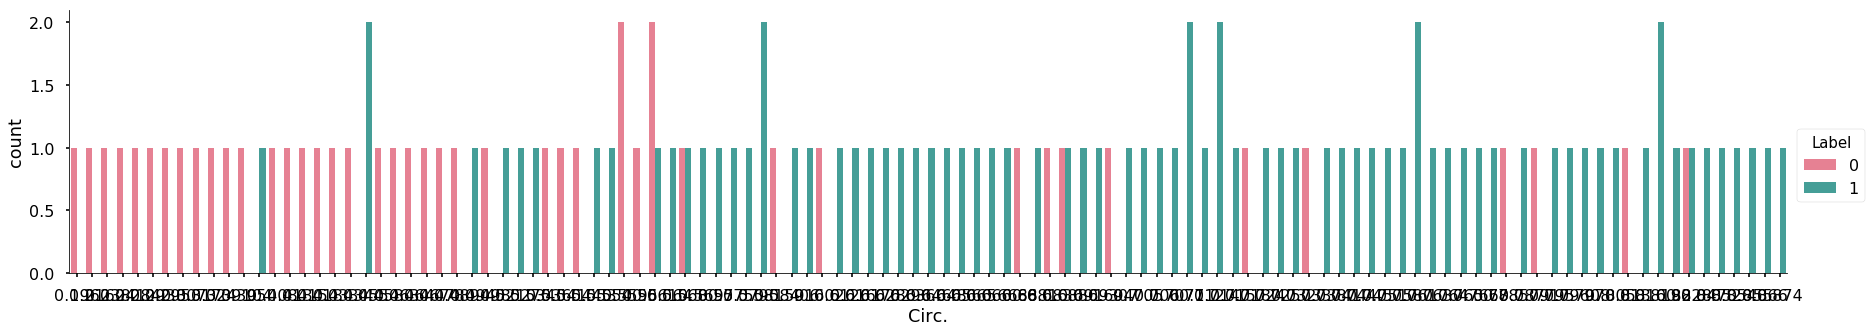

In [224]:
sns.factorplot(x='Circ.', data=mlFeats, hue='Label', kind='count', size=5, aspect=5, palette='husl')

In [225]:
print(mlFeats.iloc[:,31:])

     Solidity  Label
ID                  
1       0.520      0
2       0.820      0
3       0.820      0
4       0.927      0
5       0.721      0
6       0.657      0
7       0.900      0
8       0.813      0
9       0.865      0
10      0.688      0
11      0.713      0
12      0.800      0
13      0.704      0
14      0.689      0
15      0.833      0
16      0.856      0
17      0.743      0
18      0.892      0
19      0.518      0
20      0.718      0
21      0.907      0
22      0.925      0
23      0.642      0
24      0.621      0
25      0.791      0
26      0.702      0
27      0.827      0
28      0.775      0
29      0.933      0
30      0.931      0
..        ...    ...
99      0.907      1
100     0.926      1
101     0.912      1
102     0.919      1
103     0.930      1
104     0.915      1
105     0.914      1
106     0.850      1
107     0.966      1
108     0.908      1
109     0.902      1
110     0.951      1
111     0.950      1
112     0.942      1
113     0.947

In [226]:
mlFeatsSubset=mlFeats.iloc[:,6:14]
print(mlFeatsSubset.head())
mlFeatsSubset.shape

        X      Y     XM     YM  Perim.     BX     BY  Width
ID                                                         
1   2.713  2.750  2.660  2.803   3.645  2.229  1.990  0.875
2   2.739  2.665  2.644  2.718   2.394  2.302  2.281  0.740
3   2.613  2.646  2.598  2.662   2.251  2.354  2.333  0.625
4   2.698  2.721  2.617  2.755   3.620  2.021  2.219  1.302
5   2.685  2.661  2.603  2.612   2.997  2.250  2.208  0.833


(125, 8)

In [227]:
labelCol=mlFeats.iloc[:, 31:]
print(labelCol.head())
labelCol.shape

    Solidity  Label
ID                 
1      0.520      0
2      0.820      0
3      0.820      0
4      0.927      0
5      0.721      0


(125, 2)

In [228]:
mlFeatsPlot=pd.concat([mlFeatsSubset, labelCol], axis=1)
#mlFeatsPlot.concat(labelCol)
print(mlFeatsPlot.head())
mlFeatsPlot.shape

        X      Y     XM     YM  Perim.     BX     BY  Width  Solidity  Label
ID                                                                          
1   2.713  2.750  2.660  2.803   3.645  2.229  1.990  0.875     0.520      0
2   2.739  2.665  2.644  2.718   2.394  2.302  2.281  0.740     0.820      0
3   2.613  2.646  2.598  2.662   2.251  2.354  2.333  0.625     0.820      0
4   2.698  2.721  2.617  2.755   3.620  2.021  2.219  1.302     0.927      0
5   2.685  2.661  2.603  2.612   2.997  2.250  2.208  0.833     0.721      0


(125, 10)

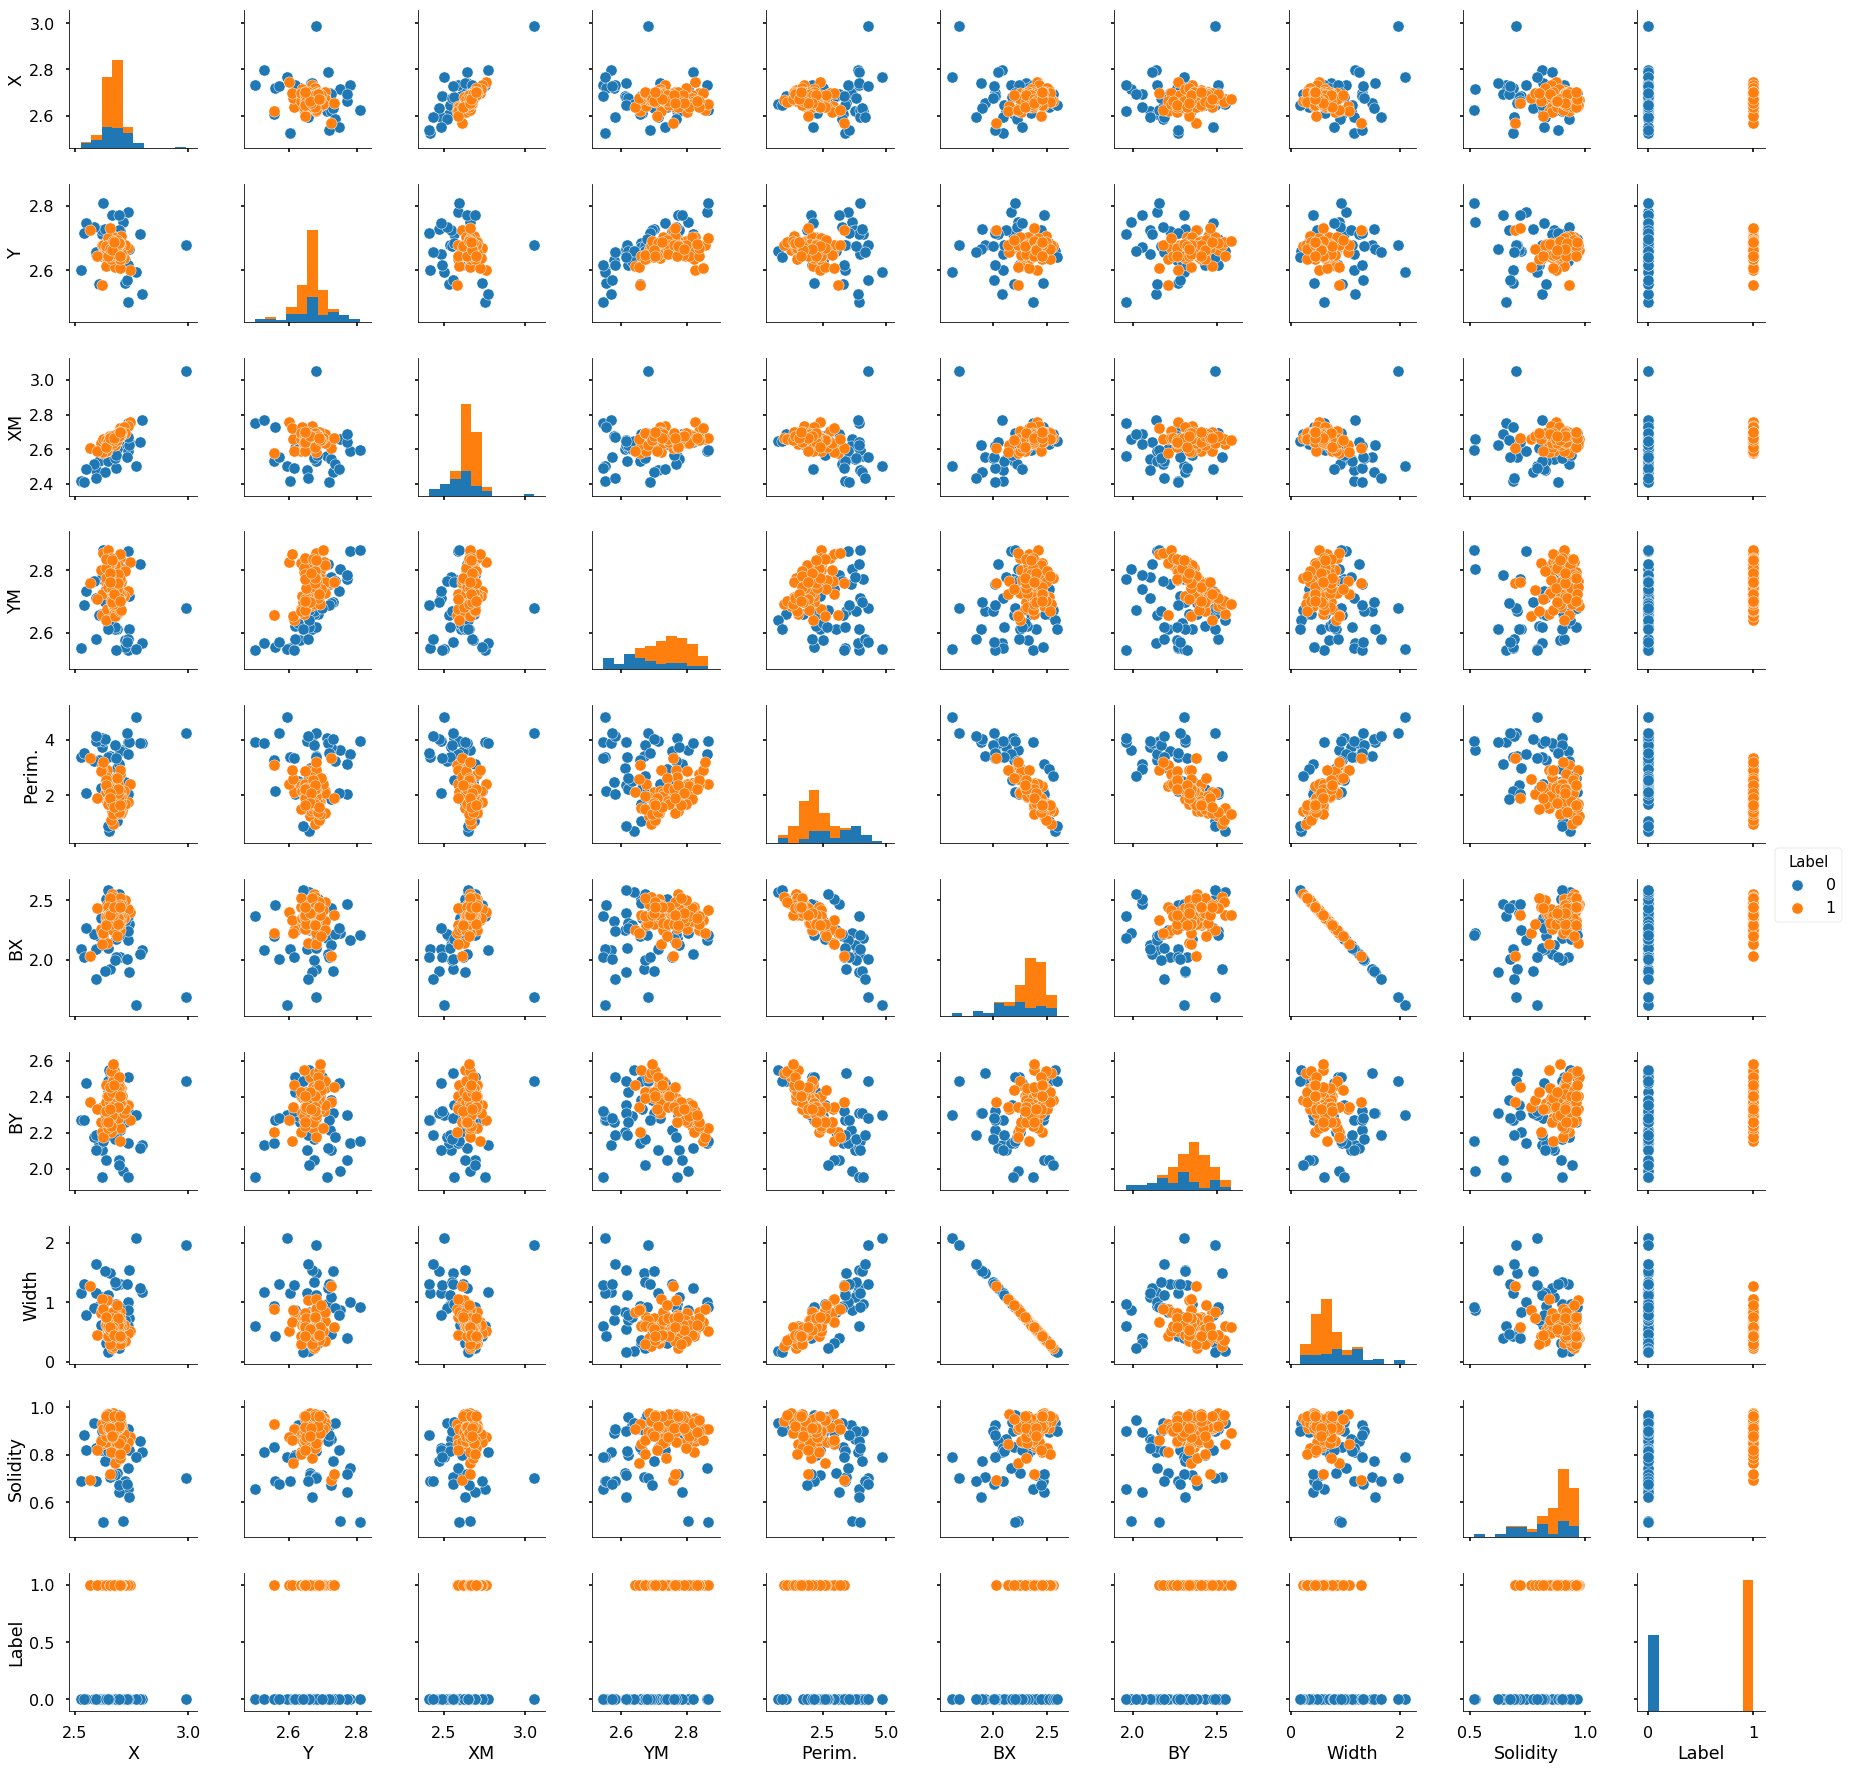

In [229]:
sns.pairplot(data=mlFeatsPlot, hue='Label')

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [231]:
logreg=LogisticRegression()

In [232]:
Y=mlFeats['Label']
Y.head()
X=mlFeats.drop('Label', axis=1)
X.head()
X.iloc[1:5, 6:14]

,X,Y,XM,YM,Perim.,BX,BY,Width
ID,,,,,,,,
2,2.739,2.665,2.644,2.718,2.394,2.302,2.281,0.740
3,2.613,2.646,2.598,2.662,2.251,2.354,2.333,0.625
4,2.698,2.721,2.617,2.755,3.620,2.021,2.219,1.302
5,2.685,2.661,2.603,2.612,2.997,2.250,2.208,0.833


In [233]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y)

In [234]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [235]:
Y_pred=logreg.predict(X_test)

In [236]:
metrics.accuracy_score(Y_test, Y_pred)

0.875

In [237]:
metrics.confusion_matrix(Y_test, Y_pred)

array([[ 8,  4],
       [ 0, 20]])

In [238]:
logreg.intercept_ #bias 

array([ -2.35236582e-05])

In [239]:
logreg.coef_

array([[ -4.88593391e-06,  -6.10624633e-03,   2.79949325e-03,
          1.46078569e-03,  -8.43407274e-03,   6.66815802e-05,
         -6.34546272e-05,  -6.26568764e-05,  -5.96116595e-05,
         -5.75474054e-05,  -8.87766362e-05,  -4.72371537e-05,
         -5.45401872e-05,  -3.10910872e-05,  -1.65411481e-05,
         -3.37389473e-05,  -1.07414075e-06,  -2.58860911e-03,
          5.80585768e-07,  -4.05033037e-05,  -7.36681954e-09,
          6.53219596e-03,  -6.63316532e-05,  -1.47831739e-04,
         -2.42119567e-07,  -4.35993791e-05,  -5.68943277e-05,
         -2.04499686e-03,  -4.92862441e-06,  -1.45618987e-04,
          2.74218057e-06,  -1.35849537e-05]])

In [240]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_knn=knn.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred_knn)

0.46875

In [241]:
cv_avgs=[]

In [242]:
from sklearn.model_selection import cross_val_score
knn_cv=KNeighborsClassifier(n_neighbors=10)
#n_neighbors=1,5,10,15,20,25
cv_scores=cross_val_score(knn_cv, X_train, Y_train, cv=10)
print(cv_scores)
cv_avgs.append(cv_scores.mean())
cv_avgs

[ 0.4         0.7         0.6         0.5         0.77777778  0.22222222
  0.33333333  0.77777778  0.55555556  0.75      ]


[0.56166666666666676]

In [243]:
knn_cv.fit(X_train, Y_train)
Y_pred_cv=knn_cv.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred_cv)

0.59375

In [244]:
cv_avgs=[]

In [245]:
logreg_cv=LogisticRegression(C=.05)
#C=.0001, .001, .01, .1
cv_scores=cross_val_score(logreg_cv, X_train, Y_train, cv=10)
print(cv_scores)
cv_avgs.append(cv_scores.mean())
cv_avgs

[ 0.9         0.9         1.          1.          0.77777778  0.88888889
  0.77777778  1.          1.          1.        ]


[0.9244444444444444]

In [246]:
logreg_cv.fit(X_train, Y_train)
Y_pred_cv=logreg_cv.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred_cv)

0.9375

In [247]:
Y_test.mean() #null error rate (i think)

0.625

## Logistic Regression did pretty good, kNN didn't do much better than null error

In [248]:
from sklearn import svm
clf=svm.SVC(gamma=.001, C=100)
clf=clf.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)

0.625

In [282]:
cv_avgs=[]

# scale data to [-1,1]

In [250]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [283]:
svm_cv=svm.SVC(kernel='linear', gamma=.001, C=100)
#C=10, 100, 1000
#gamma=.0001, .001, .01, .1
cv_scores=cross_val_score(svm_cv, X_train, Y_train, cv=10)
print(cv_scores)
cv_avgs.append(cv_scores.mean())
cv_avgs

[ 1.          0.9         1.          0.9         1.          1.
  0.77777778  1.          1.          1.        ]


[0.95777777777777773]

In [284]:
svm_cv.fit(X_train, Y_train)
Y_pred_cv=svm_cv.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred_cv))
print()

0.96875



## don't know which parameters to change to influence guess

why does linear kernel take so long? scale data!!!!

In [267]:
cv_avgs=[]

In [279]:
svm_cv=svm.SVC(kernel='rbf', gamma=.1, C=10)
#C=10, 100, 1000
#gamma=.0001, .001, .01, .1
cv_scores=cross_val_score(svm_cv, X_train, Y_train, cv=10)
print(cv_scores)
cv_avgs.append(cv_scores.mean())
cv_avgs

[ 1.          1.          1.          0.9         1.          1.
  0.88888889  1.          1.          1.        ]


[0.9688888888888888,
 0.95777777777777773,
 0.94666666666666666,
 0.97888888888888881,
 0.97888888888888881,
 0.95777777777777773,
 0.9688888888888888,
 0.93555555555555547,
 0.63583333333333336,
 0.93555555555555547,
 0.97888888888888881,
 0.97888888888888881]

In [280]:
svm_cv.fit(X_train, Y_train)
Y_pred_cv=svm_cv.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred_cv))
print()

1.0



## linear kernel works better

## feature selection - must use linear svm

In [285]:
from sklearn.feature_selection import SelectFromModel
model=SelectFromModel(svm_cv, prefit=True)
X_new=model.transform(X_train)
print(X_new.shape)
X_new_test=model.transform(X_test)
print(X_new_test.shape)

(93, 10)
(32, 10)


In [294]:
print(X.columns[model.get_support()])

Index(['Mode', 'Min', 'Y', 'XM', 'YM', 'Circ.', 'Median', 'Kurt', 'MinFeret',
       'Round'],
      dtype='object')


In [299]:
svm_new=svm.SVC(kernel='linear', gamma=.001, C=100)
svm_new.fit(X_new, Y_train)
y_pred_svm_new=svm_new.predict(X_new_test)
print("Feature Selection SVM")
print(metrics.accuracy_score(Y_test, y_pred_svm_new))

Feature Selection SVM
0.96875


## recursive feature elimination

In [308]:
from sklearn.feature_selection import RFE

selector=RFE(svm_new, 2, step=1)
selector=selector.fit(X_new,Y_train)
y_pred_selected=selector.predict(X_new_test)
print("Recursive Feature Elimination")
print(metrics.accuracy_score(Y_test, y_pred_selected))
selector.support_
X_new_cols=np.array(['Mode', 'Min', 'Y', 'XM', 'YM', 'Circ.', 'Median', 'Kurt', 'MinFeret',
       'Round'])
print(X_new_cols[selector.support_])

Recursive Feature Elimination
0.90625
['Min' 'YM']
